In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier , IsolationForest
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset using pandas
cc = pd.read_csv('creditcard.csv')

In [3]:
# dataset exploring
print(cc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
# Print the shape of the data
cc = cc.sample(frac=0.1, random_state = 1)
print(cc.shape)
print(cc.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

In [5]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 169876 to 97365
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

In [7]:
x = cc.iloc[: , 1:30].values
y = cc.iloc[:, 30].values
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (28481, 29)
Output Range :  (28481,)


In [8]:
print ("Class Labels : \n", y)

Class Labels : 
 [0 0 0 ... 0 0 0]


In [9]:
cc.isnull().values.any()

False

Text(0, 0.5, 'No of occurences')

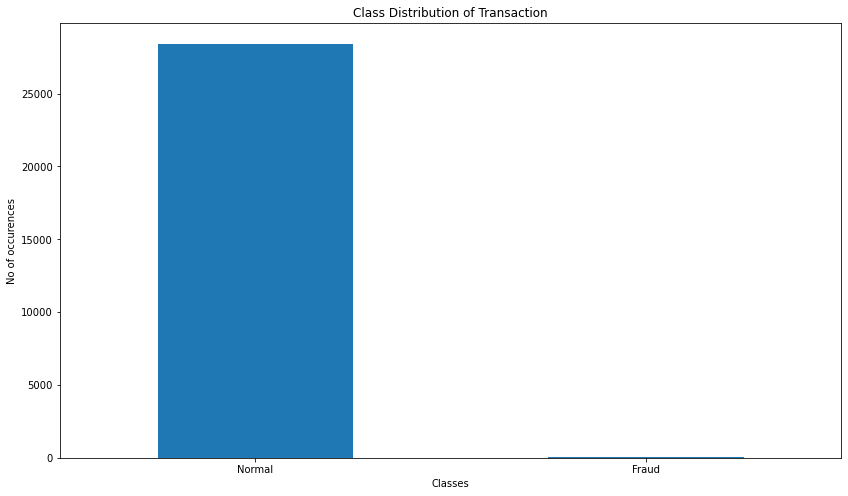

In [10]:
set_class = pd.value_counts(cc['Class'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

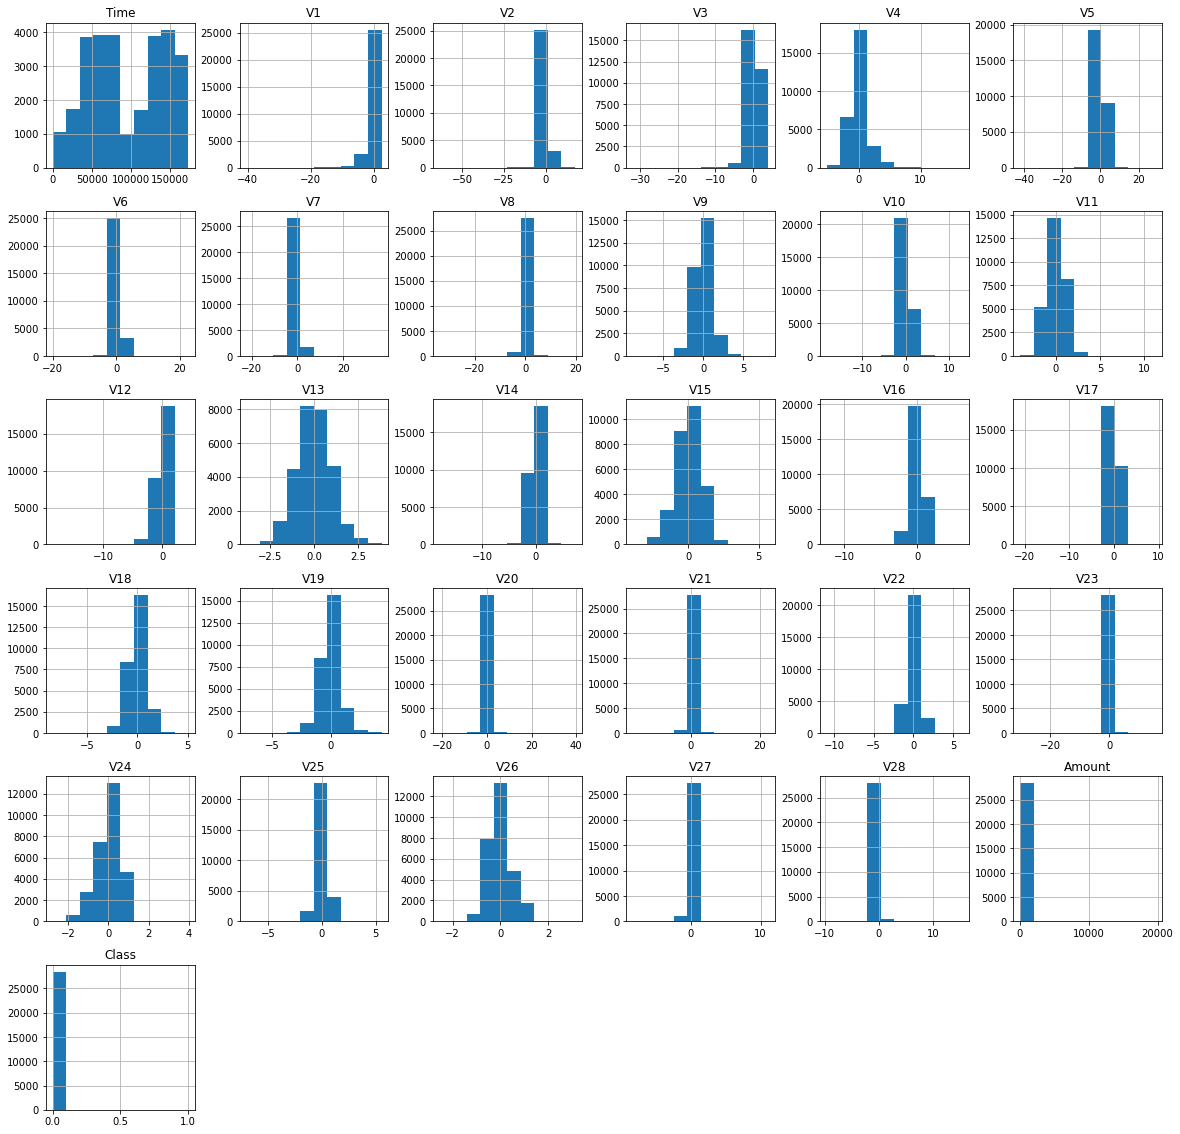

In [11]:
# Plot histograms of each parameter 
cc.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset

Fraud = cc[cc['Class'] == 1]
Valid = cc[cc['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(cc[cc['Class'] == 1])))
print('Valid Transactions: {}'.format(len(cc[cc['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


In [13]:
Fraud.Amount.describe()

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
Valid.Amount.describe()

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

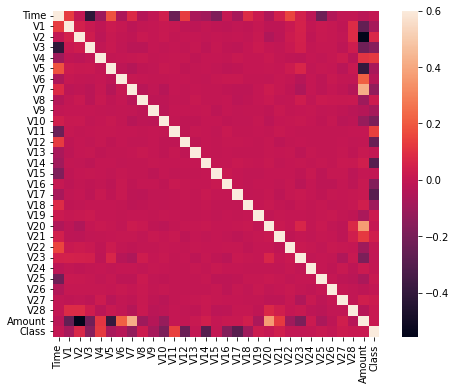

In [15]:
# Correlation matrix
corrmat = cc.corr()
fig = plt.figure(figsize = (8, 6))

sns.heatmap(corrmat, vmax = .6, square = True)
plt.show()

In [16]:
# Get all the columns from the dataFrame
columns = cc.columns.tolist()

In [17]:
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

In [18]:
# Store the variable we'll be predicting on
target = "Class"

X = cc[columns]
Y = cc[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [19]:
# define random states
state = 1

In [20]:
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
    
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 648x504 with 0 Axes>

In [21]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
     # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [27]:
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

